# Covid-19 vaccine analysis 

**Importing the neccessary libraries**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

**Fetching the gloabal data from John Hopkins Center of Systems Science and Engineering Github**

In [ ]:
from google.colab import files
#data_to_load = files.upload()

df_vaccine_data = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/vaccine_data_global.csv', sep=',', error_bad_lines = False, encoding='latin-1')
                              #usecols= ['Country_Region','Date', 'Doses_admin','People_partially_vaccinated','People_fully_vaccinated','Report_Date_String','UID'])

In [ ]:
#data_to_load

In [ ]:
#df_vaccine_data = pd.read_csv('International_vaccine.csv', sep=',', error_bad_lines = False, encoding='latin-1')
#usecols= ['Country_Region','Date', 'Doses_admin','People_partially_vaccinated','People_fully_vaccinated','Report_Date_String','UID'])

#print Dataframe
print(df_vaccine_data.shape)
df_vaccine_data.head(5)

(194, 7)


,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,Afghanistan,2021-04-07,120000.0,120000.0,0.0,2021/04/07,4.0
1,Africa,2021-04-18,15283877.0,10427489.0,4628464.0,2021/04/18,NaN
2,Albania,2021-04-18,332905.0,6073.0,655.0,2021/04/18,8.0
3,Algeria,2021-02-19,75000.0,0.0,0.0,2021/02/19,12.0
4,Andorra,2021-04-12,19064.0,9781.0,4484.0,2021/04/12,20.0


In [ ]:
#!pip install xlrd

In [ ]:
df_vaccine_data.info() #dataframe datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country_Region               194 non-null    object 
 1   Date                         194 non-null    object 
 2   Doses_admin                  194 non-null    float64
 3   People_partially_vaccinated  194 non-null    float64
 4   People_fully_vaccinated      194 non-null    float64
 5   Report_Date_String           194 non-null    object 
 6   UID                          173 non-null    float64
dtypes: float64(4), object(3)
memory usage: 10.7+ KB


In [ ]:
df_vaccine_data.tail

<bound method NDFrame.tail of     Country_Region        Date  ...  Report_Date_String      UID
0      Afghanistan  2021-04-07  ...          2021/04/07      4.0
1           Africa  2021-04-18  ...          2021/04/18      NaN
2          Albania  2021-04-18  ...          2021/04/18      8.0
3          Algeria  2021-02-19  ...          2021/02/19     12.0
4          Andorra  2021-04-12  ...          2021/04/12     20.0
..             ...         ...  ...                 ...      ...
189        Vietnam  2021-04-18  ...          2021/04/18    704.0
190          Wales  2021-04-17  ...          2021/04/17  82604.0
191          World  2021-04-18  ...          2021/04/18      NaN
192         Zambia  2021-04-18  ...          2021/04/18    894.0
193       Zimbabwe  2021-04-16  ...          2021/04/16    716.0

[194 rows x 7 columns]>

In [ ]:
df_vaccine_data.describe

<bound method NDFrame.describe of     Country_Region        Date  ...  Report_Date_String      UID
0      Afghanistan  2021-04-07  ...          2021/04/07      4.0
1           Africa  2021-04-18  ...          2021/04/18      NaN
2          Albania  2021-04-18  ...          2021/04/18      8.0
3          Algeria  2021-02-19  ...          2021/02/19     12.0
4          Andorra  2021-04-12  ...          2021/04/12     20.0
..             ...         ...  ...                 ...      ...
189        Vietnam  2021-04-18  ...          2021/04/18    704.0
190          Wales  2021-04-17  ...          2021/04/17  82604.0
191          World  2021-04-18  ...          2021/04/18      NaN
192         Zambia  2021-04-18  ...          2021/04/18    894.0
193       Zimbabwe  2021-04-16  ...          2021/04/16    716.0

[194 rows x 7 columns]>

In [ ]:
df_vaccine_data.isnull #checking for null values

<bound method DataFrame.isnull of     Country_Region        Date  ...  Report_Date_String      UID
0      Afghanistan  2021-04-07  ...          2021/04/07      4.0
1           Africa  2021-04-18  ...          2021/04/18      NaN
2          Albania  2021-04-18  ...          2021/04/18      8.0
3          Algeria  2021-02-19  ...          2021/02/19     12.0
4          Andorra  2021-04-12  ...          2021/04/12     20.0
..             ...         ...  ...                 ...      ...
189        Vietnam  2021-04-18  ...          2021/04/18    704.0
190          Wales  2021-04-17  ...          2021/04/17  82604.0
191          World  2021-04-18  ...          2021/04/18      NaN
192         Zambia  2021-04-18  ...          2021/04/18    894.0
193       Zimbabwe  2021-04-16  ...          2021/04/16    716.0

[194 rows x 7 columns]>

# **Cleaning the data** 

In [ ]:
#import re   
def get_clean_text(data):
    cleaned=[]
    for world in data:
        single_lower= re.sub(r'\s+',' ',world).lower() # Multiple space removal and conevrt to lower case
        clean_text = re.sub('[^a-zA-Z]',' ', single_lower)
        cleaned.append(clean_text)
    return cleaned

In [ ]:
cleaned=get_clean_text(df_vaccine_data['Country_Region'])
print(cleaned)

df_clean=pd.DataFrame({'Country':cleaned})
df_clean.head(2)

['afghanistan', 'africa', 'albania', 'algeria', 'andorra', 'angola', 'anguilla', 'antigua and barbuda', 'argentina', 'armenia', 'asia', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'bermuda', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brazil', 'brunei', 'bulgaria', 'cambodia', 'cameroon', 'canada', 'cape verde', 'cayman islands', 'chile', 'china', 'colombia', 'costa rica', 'cote d ivoire', 'croatia', 'curacao', 'cyprus', 'czechia', 'denmark', 'dominica', 'dominican republic', 'ecuador', 'egypt', 'el salvador', 'england', 'equatorial guinea', 'estonia', 'eswatini', 'ethiopia', 'europe', 'european union', 'faeroe islands', 'falkland islands', 'fiji', 'finland', 'france', 'gabon', 'gambia', 'georgia', 'germany', 'ghana', 'gibraltar', 'greece', 'greenland', 'grenada', 'guatemala', 'guernsey', 'guinea', 'guyana', 'honduras', 'hong kong', 'hungary', 'iceland', 'india', 'indonesia', 'iran', 'iraq', 'irel

,Country
0,afghanistan
1,africa


**Remove stopwords**

In [ ]:
import nltk
def remove_stopwords(data):
    nltk.download('stopwords')
    stop_words = nltk.corpus.stopwords.words("english")
    splited_text=data.str.split()
    text_no_stopwords=[]
    for i in range(len(splited_text)):
        text_no_stopwords1 = [word for word in splited_text[i] if word not in stop_words]
        text_no_stopwords.append(' '.join(text_no_stopwords1))
    return text_no_stopwords

In [ ]:
a=remove_stopwords(df_clean['Country'])
df_clean['no_stopwords']=a; 
df_clean['Doses_admin']=df_vaccine_data['Doses_admin']
df_clean.head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Country,no_stopwords,Doses_admin
0,afghanistan,afghanistan,120000.0
1,africa,africa,15283877.0


**Check for missing data**

In [ ]:
round(100*(df_vaccine_data.isnull().sum()/len(df_vaccine_data.index)),2)

Country_Region                  0.00
Date                            0.00
Doses_admin                     0.00
People_partially_vaccinated     0.00
People_fully_vaccinated         0.00
Report_Date_String              0.00
UID                            10.82
dtype: float64

In [ ]:
df_vaccine_data.loc[np.isnan(df_vaccine_data['Doses_admin']),['Doses_admin']] = 0
#df.loc[np.isnan(df['Country_Region']),['Country_Region']] = 0
df_vaccine_data.loc[np.isnan(df_vaccine_data['People_partially_vaccinated']),['People_partially_vaccinated']] = 0
df_vaccine_data.loc[np.isnan(df_vaccine_data['People_fully_vaccinated']),['People_fully_vaccinated']] = 0
df_vaccine_data.loc[np.isnan(df_vaccine_data['UID']),['UID']] = 0
df_vaccine_data

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,Afghanistan,2021-04-07,120000.0,120000.0,0.0,2021/04/07,4.0
1,Africa,2021-04-18,15283877.0,10427489.0,4628464.0,2021/04/18,0.0
2,Albania,2021-04-18,332905.0,6073.0,655.0,2021/04/18,8.0
3,Algeria,2021-02-19,75000.0,0.0,0.0,2021/02/19,12.0
4,Andorra,2021-04-12,19064.0,9781.0,4484.0,2021/04/12,20.0
...,...,...,...,...,...,...,...
189,Vietnam,2021-04-18,79182.0,79182.0,0.0,2021/04/18,704.0
190,Wales,2021-04-17,2286756.0,1685298.0,601458.0,2021/04/17,82604.0
191,World,2021-04-18,904919444.0,500164189.0,203934442.0,2021/04/18,0.0
192,Zambia,2021-04-18,1316.0,1316.0,0.0,2021/04/18,894.0


In [ ]:
#df_vaccine_data["Country_Region"].unique()

In [ ]:
#changing the report_date_string date format
df_vaccine_data['Report_Date_String'] = pd.to_datetime(df_vaccine_data['Report_Date_String'], format = "%Y-%m-%d")
df_vaccine_data

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,Afghanistan,2021-04-07,120000.0,120000.0,0.0,2021-04-07,4.0
1,Africa,2021-04-18,15283877.0,10427489.0,4628464.0,2021-04-18,0.0
2,Albania,2021-04-18,332905.0,6073.0,655.0,2021-04-18,8.0
3,Algeria,2021-02-19,75000.0,0.0,0.0,2021-02-19,12.0
4,Andorra,2021-04-12,19064.0,9781.0,4484.0,2021-04-12,20.0
...,...,...,...,...,...,...,...
189,Vietnam,2021-04-18,79182.0,79182.0,0.0,2021-04-18,704.0
190,Wales,2021-04-17,2286756.0,1685298.0,601458.0,2021-04-17,82604.0
191,World,2021-04-18,904919444.0,500164189.0,203934442.0,2021-04-18,0.0
192,Zambia,2021-04-18,1316.0,1316.0,0.0,2021-04-18,894.0


# **Divide Data into training and testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
df_vaccine_data_train, df_vaccine_data_test, df_vaccine_data_Doses_admin_train, df_vaccine_data_Doses_admin_test = train_test_split(
df_clean['Country'],df_clean['Doses_admin'], test_size=0.50, random_state=2)

# **create vectors using TFiDF transformatiaon **

In [ ]:
#TFiDF Transformation
# Parameter election
from sklearn.feature_extraction.text import TfidfVectorizer
ngram_range = (1,2); min_df = 2; max_df = 10.
max_features = 300
max_features=max_features
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        norm='l2',
                        sublinear_tf=True)
df_vaccine_data_train_tfidf = tfidf.fit_transform(df_vaccine_data_train).toarray()
print(df_vaccine_data_train_tfidf.shape)
df_vaccine_data_test_tfidf = tfidf.transform(df_vaccine_data_test).toarray()
print(df_vaccine_data_train_tfidf.shape)

(97, 7)
(97, 7)


# Machine Learning Algorithms


*   knn
*   svm







In [ ]:
# First, we can see what hyperparameters the model has:
from sklearn.metrics import  accuracy_score
from sklearn import svm
SVM = svm.SVC()
print('Check the parameters of SVM:\n',SVM.get_params())

Check the parameters of SVM:
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# Check the accuracy of the SVM base model:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
SVM_base_model = svm.SVC()
SVM_base_model.fit(df_vaccine_data_train_tfidf, df_vaccine_data_Doses_admin_train)
SVM_base_model_accur=accuracy_score(df_vaccine_data_Doses_admin_test, SVM_base_model.predict(df_vaccine_data_test_tfidf))
print('The accuracy score of SVM_base_model:',SVM_base_model_accur)

The accuracy score of SVM_base_model: 0.0


In [ ]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.neighbors import KNeighborsClassifier

#check the accuracy of KNN
KNN_base_model = KNeighborsClassifier()
KNN_base_model.fit(df_vaccine_data_train_tfidf, df_vaccine_data_Doses_admin_train)
KNN_base_model_accur=accuracy_score(df_vaccine_data_Doses_admin_test, KNN_base_model.predict(df_vaccine_data_test_tfidf))
print('The accuracy score of KNN_base_model:',KNN_base_model_accur)

The accuracy score of KNN_base_model: 0.0


# **Exploratory Data Analysis **

In [ ]:
!pip install --upgrade plotly==4.5.2
!pip install jupyter-dash

     |████████████████████████████████| 7.1MB 4.8MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 81kB 3.4MB/s 
     |████████████████████████████████| 1.0MB 7.1MB/s 
     |████████████████████████████████| 3.5MB 12.9MB/s 
     |████████████████████████████████| 92kB 8.1MB/s 
     |████████████████████████████████| 1.8MB 44.6MB/s 
     |████████████████████████████████| 358kB 49.2MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-none-any.whl size=85834 sha256=7e1dcb0f899fa502c604f514a1465830c8c3d6f3045ee58466a854d0df6e054b
  Stored in directory: /root/.cache/pip/wheels/e6/33/41/ce361d0d1da277d2350f815b10f2ab1e331592d93ef2b07e29
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-cp37-none-any.whl size=1014875 sha256=c4dbc93cb0e421daecd3a8a25b54dfecb7dc945f8d06ab33bf9148db031a9261
  Stored in directory: /root/.cache/pip/wheels/03/a9/c5/dd5815c601b0ede16

In [ ]:
 import plotly.graph_objects as go
 import plotly.graph_objects as go
 import plotly.express as px
 from jupyter_dash import JupyterDash
 import dash_core_components as dcc
 #import dash_html_components as html
 import pandas as pd
 from dash.dependencies import Input, Output 
 import  numpy as np

In [ ]:
df_vaccine_data.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,Afghanistan,2021-04-07,120000.0,120000.0,0.0,2021-04-07,4.0
1,Africa,2021-04-18,15283877.0,10427489.0,4628464.0,2021-04-18,0.0
2,Albania,2021-04-18,332905.0,6073.0,655.0,2021-04-18,8.0
3,Algeria,2021-02-19,75000.0,0.0,0.0,2021-02-19,12.0
4,Andorra,2021-04-12,19064.0,9781.0,4484.0,2021-04-12,20.0


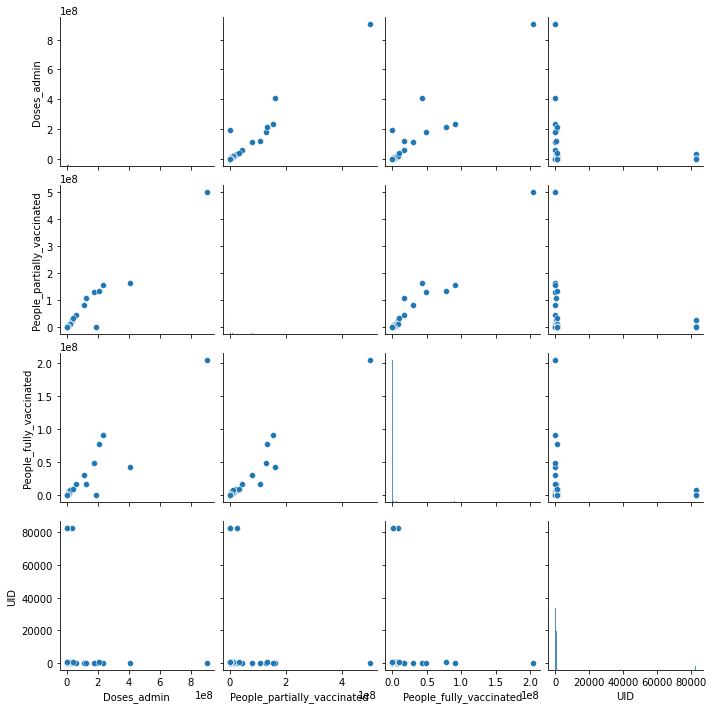

In [ ]:
sns.pairplot(df_vaccine_data)
#sns.relplot(x='People_partially_vaccinated', y='People_fully_vaccinated',hue = 'Doses_admin', international_vaccine =df.Doses_admin )

In [ ]:
fig = go.Figure(go.Scatter(
    y=df_vaccine_data["Country_Region"],
    x=df_vaccine_data["People_fully_vaccinated"],
    #text=df_vaccine_data["Country_Region"],
    #mode='markers',
    
    
  
))
# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area'
                                             , line_width=4))


fig.update_layout(
    title='People Fully Vaccinated per Country/Region',
    xaxis=dict(
        title='People_fully_vaccinated',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Country/Region',
        gridcolor='white',
        gridwidth=8,
    )
    
)

fig.show()

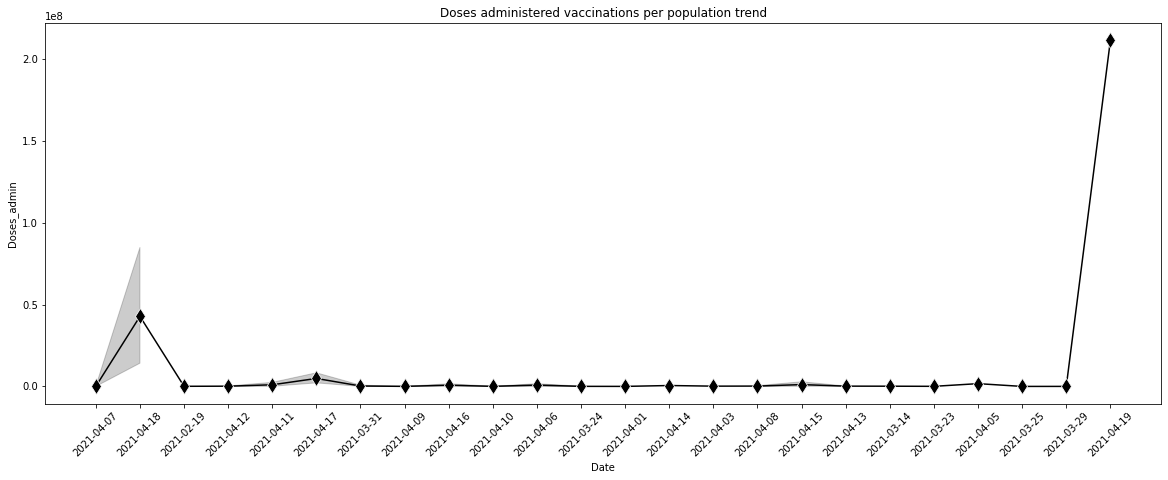

In [ ]:
plt.figure(figsize=(20,7))

sns.lineplot(data=df_vaccine_data,x="Date",y="Doses_admin",marker='d',markersize= 12, color = 'k')

plt.title("Doses administered vaccinations per population trend")
plt.xticks(rotation=45)
plt.show();

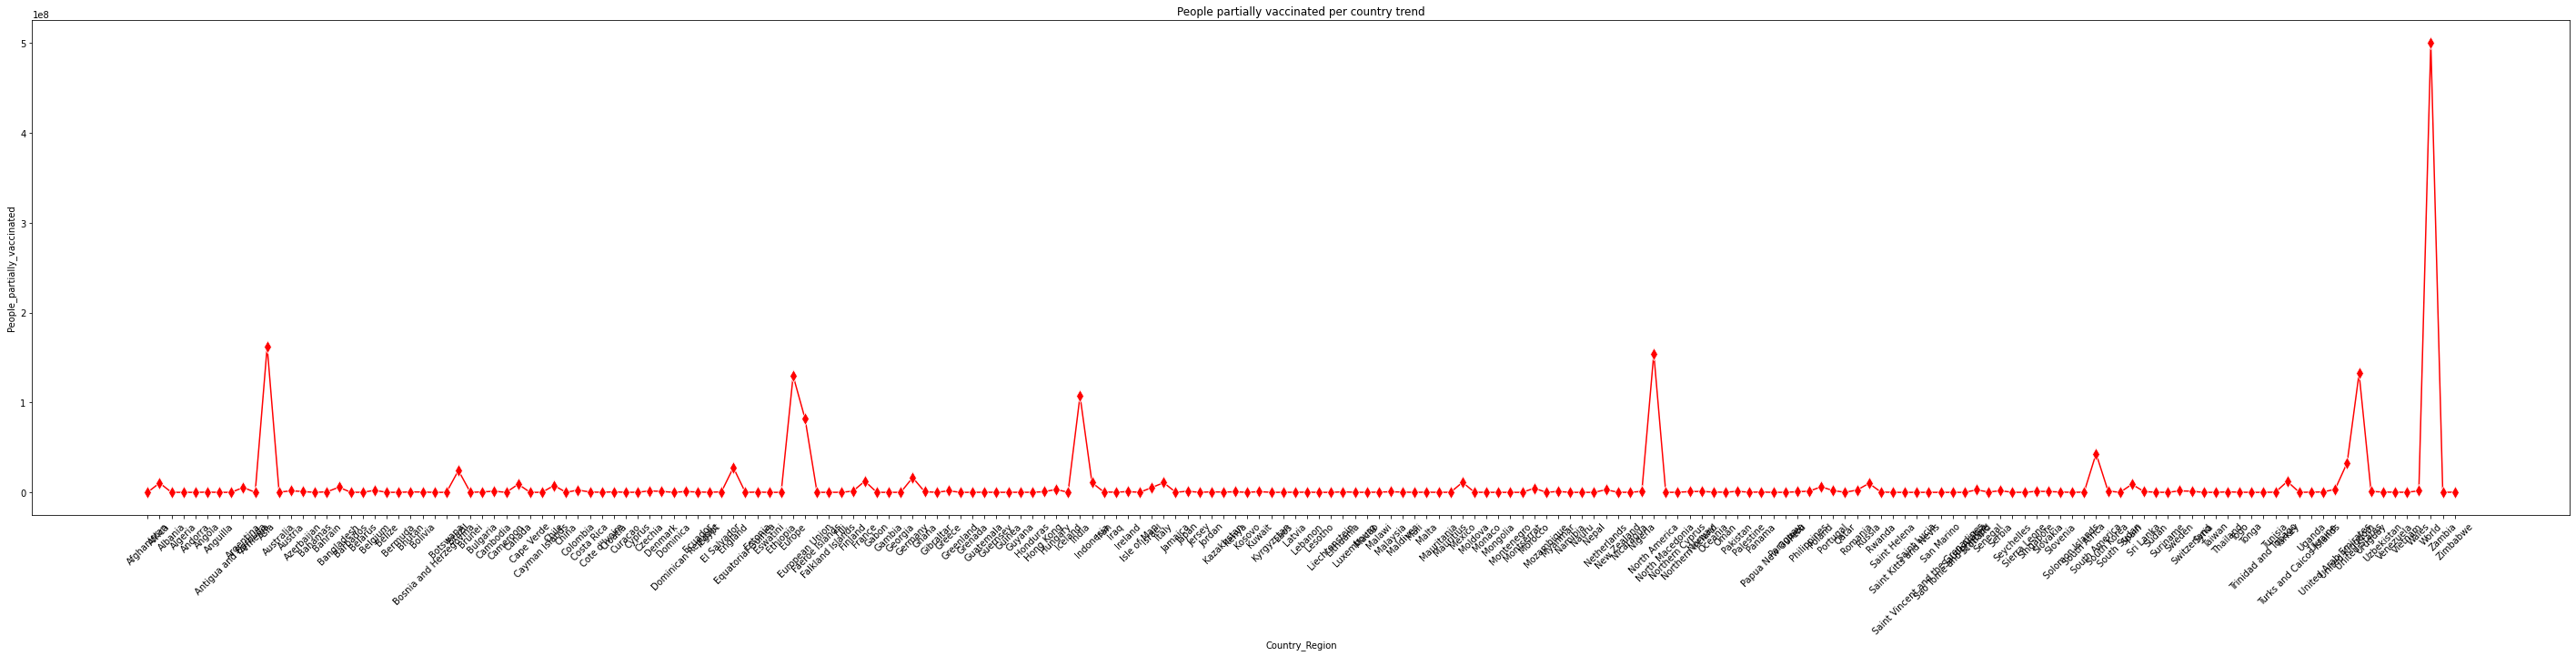

In [ ]:
plt.figure(figsize=(50,10))

sns.lineplot(data=df_vaccine_data,x="Country_Region",y="People_partially_vaccinated",marker='d',markersize= 10, color = 'red')

plt.title("People partially vaccinated per country trend")
plt.xticks(rotation=45)
plt.show();

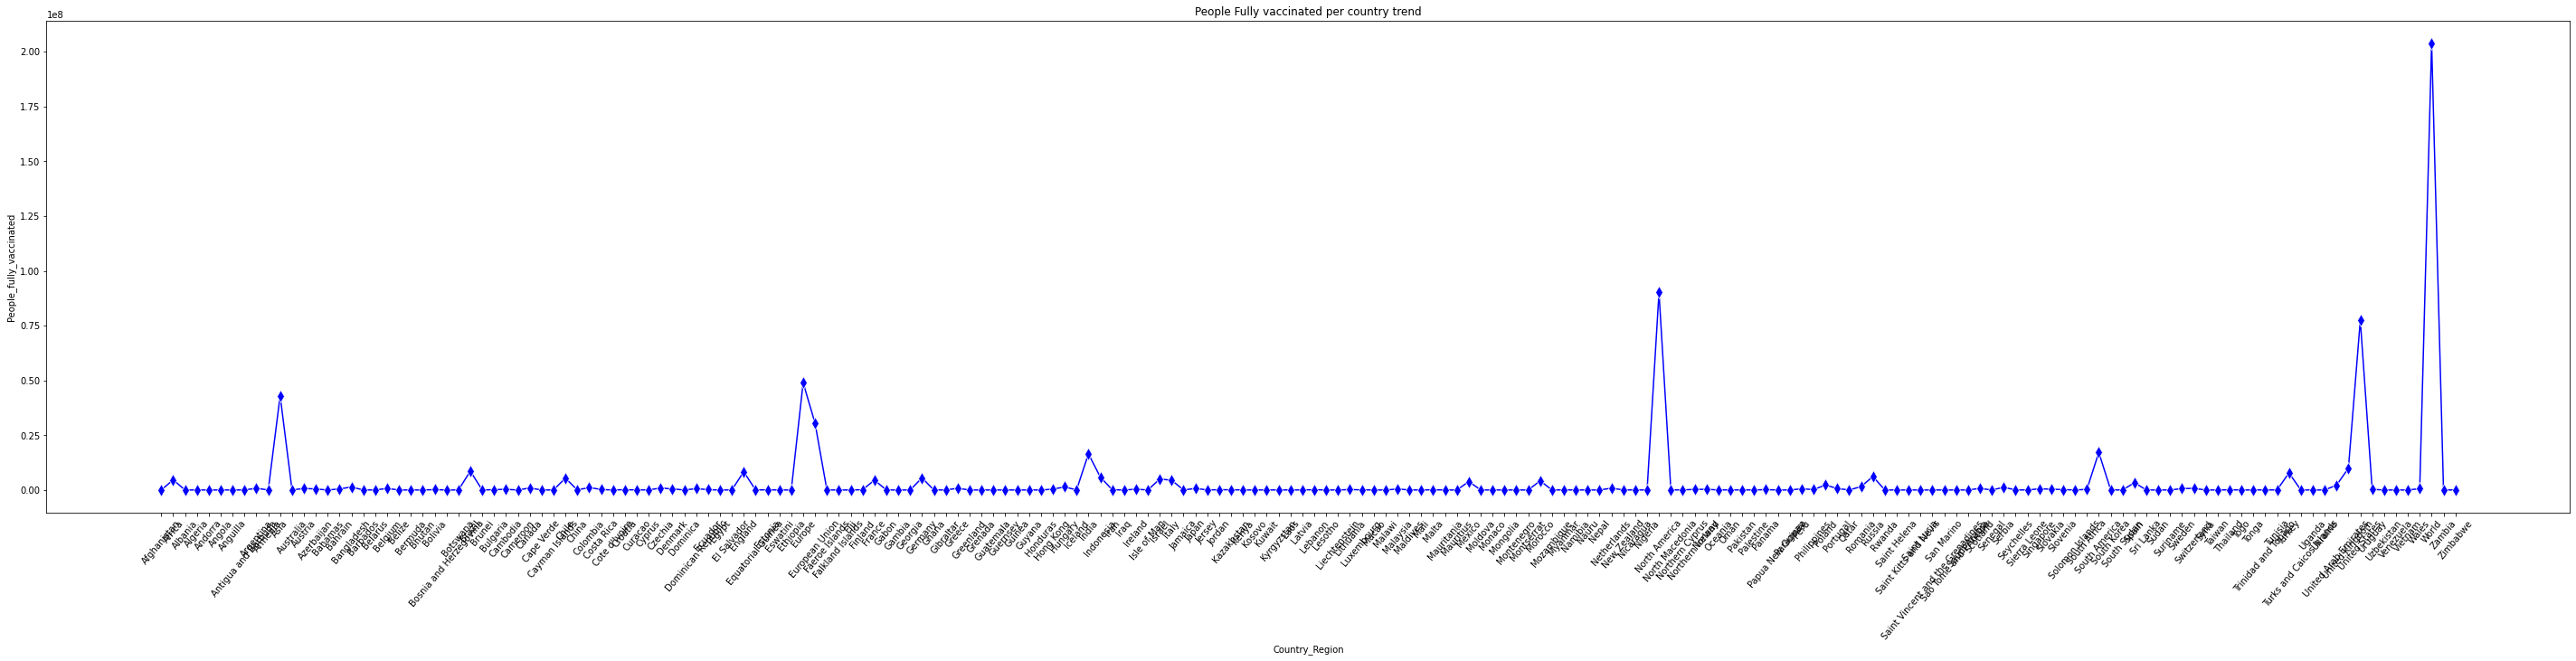

In [ ]:
plt.figure(figsize=(50,10))

sns.lineplot(data=df_vaccine_data,x="Country_Region",y="People_fully_vaccinated",marker='d',markersize= 10, color = 'blue')

plt.title("People Fully vaccinated per country trend")
plt.xticks(rotation=50)
plt.show();

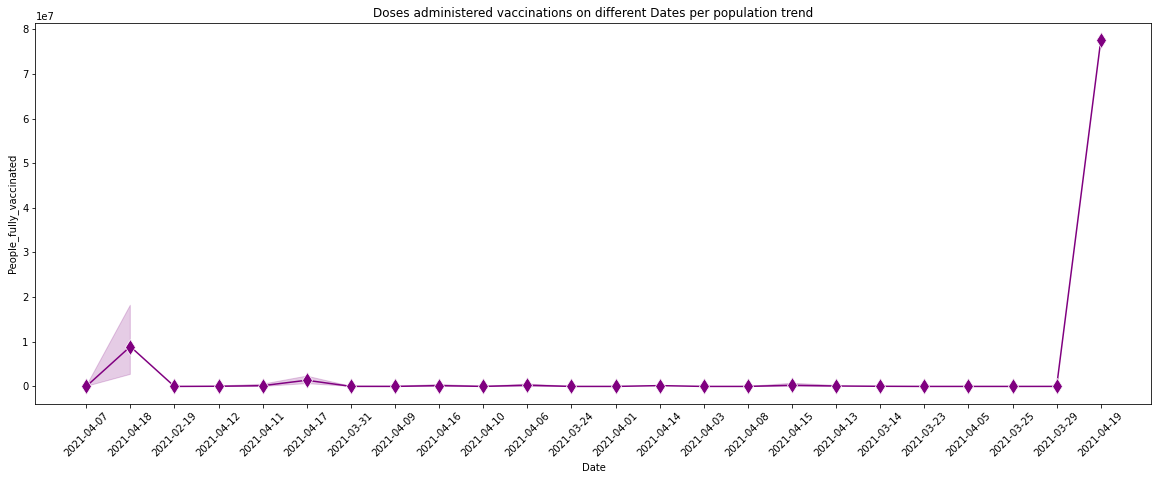

In [ ]:
plt.figure(figsize=(20,7))

sns.lineplot(data=df_vaccine_data,x="Date",y="People_fully_vaccinated",marker='d',markersize= 12, color = 'purple')

plt.title("Doses administered vaccinations on different Dates per population trend")
plt.xticks(rotation=45)
plt.show();

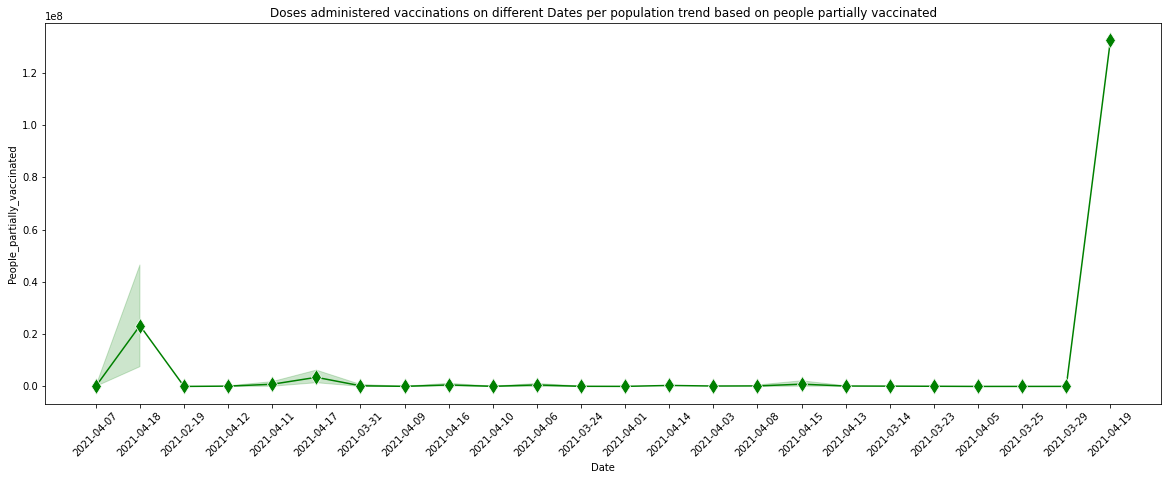

In [ ]:
plt.figure(figsize=(20,7))

sns.lineplot(data=df_vaccine_data,x="Date",y="People_partially_vaccinated",marker='d',markersize= 12, color = 'green')

plt.title("Doses administered vaccinations on different Dates per population trend based on people partially vaccinated")
plt.xticks(rotation=45)
plt.show();

In [ ]:
plt.figure(figsize=(200,150))
sns.barplot(data=df_vaccine_data, y="People_fully_vaccinated",x="Country_Region")

plt.title("Country's total vaccinated population trend")
plt.xticks(rotation=50);

In [ ]:
# for calender map
! pip install calmap

# to convert us statenames to state codes
! pip install us

# to get continent name from country name
! pip install pycountry_convert

     |████████████████████████████████| 133kB 5.5MB/s 
  Created wheel for us: filename=us-2.0.2-cp37-none-any.whl size=11929 sha256=35771aab3ccab7bb70355eb6f521247a785bfbe7488bff9fbae9cd42419a9e30
  Stored in directory: /root/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp37-cp37m-linux_x86_64.whl size=72102 sha256=effdade08ab3f3a611de7c9ccf614078e3e522b5cf6ae8ff32520afc570906a6
  Stored in directory: /root/.cache/pip/wheels/9c/6f/33/92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish
     |████████████████████████████████| 10.1MB 5.8MB/s 
     |████████████████████████████████| 245kB 52.1MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=fbe939f3f880517e4bdc65d02766adf2eb71bae8193d8e620ef0bb881d1f1c8d
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Succes

In [ ]:
#!pip install --upgrade plotly==4.5.2
fig = px.treemap(df_vaccine_data, path=['Doses_admin','People_fully_vaccinated','People_partially_vaccinated','Report_Date_String'], color='Country_Region')
fig.show()

In [ ]:
!pip install plotly-geo 
!pip install geopandas --upgrade
!pip install pyshp == 1.2.10
!pip install shaprly==1.6.3
!pip install chart_studio 

     |████████████████████████████████| 23.7MB 1.3MB/s 
     |████████████████████████████████| 1.0MB 5.7MB/s 
     |████████████████████████████████| 15.3MB 333kB/s 
     |████████████████████████████████| 6.5MB 51.2MB/s 
ERROR: Invalid requirement: '=='
ERROR: Could not find a version that satisfies the requirement shaprly==1.6.3 (from versions: none)
ERROR: No matching distribution found for shaprly==1.6.3
     |████████████████████████████████| 71kB 3.6MB/s 


In [ ]:
df_vaccine_data.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,Afghanistan,2021-04-07,120000.0,120000.0,0.0,2021-04-07,4.0
1,Africa,2021-04-18,15283877.0,10427489.0,4628464.0,2021-04-18,0.0
2,Albania,2021-04-18,332905.0,6073.0,655.0,2021-04-18,8.0
3,Algeria,2021-02-19,75000.0,0.0,0.0,2021-02-19,12.0
4,Andorra,2021-04-12,19064.0,9781.0,4484.0,2021-04-12,20.0


In [ ]:
#import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [ ]:
import os
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'sample_data']


In [ ]:
fig = px.pie(df_vaccine_data, values='Doses_admin', names='Country_Region', color_discrete_sequence=px.colors.sequential.RdBu , title='Doeses administered per country/Region')
fig.show()

In [ ]:
fig = px.pie(df_vaccine_data, values='People_fully_vaccinated', names='Country_Region', color_discrete_sequence=px.colors.sequential.RdBu, title= 'People fully vaccinated per country/Region')
fig.show()

In [ ]:
df_vaccine_data[df_vaccine_data.columns[-3]].sum()

645404158.0

In [ ]:

test=df_vaccine_data[list(df_vaccine_data.columns[0:3])+list([df_vaccine_data.columns[-2]])]
test


,Country_Region,Date,Doses_admin,Report_Date_String
0,Afghanistan,2021-04-07,120000.0,2021-04-07
1,Africa,2021-04-18,15283877.0,2021-04-18
2,Albania,2021-04-18,332905.0,2021-04-18
3,Algeria,2021-02-19,75000.0,2021-02-19
4,Andorra,2021-04-12,19064.0,2021-04-12
...,...,...,...,...
189,Vietnam,2021-04-18,79182.0,2021-04-18
190,Wales,2021-04-17,2286756.0,2021-04-17
191,World,2021-04-18,904919444.0,2021-04-18
192,Zambia,2021-04-18,1316.0,2021-04-18


# **Backend for django display**

In [ ]:
djangoData=df_vaccine_data[['Country_Region',df_vaccine_data.columns[-3]]].groupby('Country_Region').sum().sort_values(by='People_fully_vaccinated',ascending=False)
djangoData

,People_fully_vaccinated
Country_Region,
World,203934442.0
North America,90124323.0
United States,77470417.0
Europe,48993650.0
Asia,43030666.0
...,...
Eswatini,0.0
Ethiopia,0.0
North Macedonia,0.0


In [ ]:
djangoData=df_vaccine_data[['Country_Region',df_vaccine_data.columns[-3]]].groupby('Country_Region').sum()
djangoData=djangoData.reset_index()
djangoData.columns=['Country_Region','values']
djangoData=djangoData.sort_values(by='values',ascending=False)
djangoDataVals=djangoData['values'].values.tolist()
country_name=djangoData['Country_Region'].values.tolist()
#djangoData=djangoData.sort_values(by='values',ascending=False)

In [ ]:
djangoDataVals

[203934442.0,
 90124323.0,
 77470417.0,
 48993650.0,
 43030666.0,
 30462977.0,
 17127145.0,
 16480796.0,
 9930846.0,
 8597020.0,
 8322627.0,
 7787785.0,
 6147266.0,
 5890790.0,
 5517282.0,
 5426216.0,
 4977399.0,
 4628464.0,
 4505662.0,
 4468690.0,
 4186449.0,
 3844491.0,
 3328701.0,
 2248126.0,
 2187849.0,
 1554994.0,
 1391381.0,
 1366609.0,
 1227444.0,
 1135662.0,
 913214.0,
 862049.0,
 826135.0,
 799494.0,
 770207.0,
 738420.0,
 729842.0,
 718396.0,
 718374.0,
 704248.0,
 682049.0,
 649361.0,
 601458.0,
 600000.0,
 535864.0,
 526739.0,
 499471.0,
 474844.0,
 448145.0,
 438220.0,
 371197.0,
 349710.0,
 345492.0,
 301914.0,
 299631.0,
 294461.0,
 292623.0,
 268341.0,
 232508.0,
 209600.0,
 191982.0,
 175008.0,
 167933.0,
 165163.0,
 145134.0,
 138706.0,
 128538.0,
 124888.0,
 122131.0,
 121923.0,
 105392.0,
 100691.0,
 84964.0,
 84152.0,
 81815.0,
 60585.0,
 57084.0,
 48462.0,
 45944.0,
 42986.0,
 40000.0,
 38000.0,
 35294.0,
 34969.0,
 33019.0,
 30402.0,
 30281.0,
 30194.0,
 30194.0,

In [ ]:
country_name

['World',
 'North America',
 'United States',
 'Europe',
 'Asia',
 'European Union',
 'South America',
 'India',
 'United Kingdom',
 'Brazil',
 'England',
 'Turkey',
 'Russia',
 'Indonesia',
 'Germany',
 'Chile',
 'Israel',
 'Africa',
 'France',
 'Italy',
 'Morocco',
 'Mexico',
 'Spain',
 'Poland',
 'United Arab Emirates',
 'Romania',
 'Hungary',
 'Bangladesh',
 'Serbia',
 'Colombia',
 'Canada',
 'Czechia',
 'Netherlands',
 'Argentina',
 'Greece',
 'Scotland',
 'Switzerland',
 'Japan',
 'Austria',
 'Belgium',
 'Portugal',
 'Sweden',
 'Wales',
 'Dominican Republic',
 'Singapore',
 'Peru',
 'Denmark',
 'Bahrain',
 'Azerbaijan',
 'Malaysia',
 'Hong Kong',
 'Ireland',
 'Slovakia',
 'Cambodia',
 'Norway',
 'Uruguay',
 'South Africa',
 'Northern Ireland',
 'Costa Rica',
 'Lithuania',
 'Philippines',
 'Panama',
 'Ecuador',
 'Bolivia',
 'Slovenia',
 'Croatia',
 'Bulgaria',
 'Lebanon',
 'Jordan',
 'Finland',
 'Kazakhstan',
 'Iran',
 'Estonia',
 'Malta',
 'Thailand',
 'South Korea',
 'Cyprus',
 

Data was extracted from highchart(a javascript centered application that displays bar plots, maps etc). 

In [ ]:
df_json=pd.read_json('https://cdn.jsdelivr.net/gh/highcharts/highcharts@v7.0.0/samples/data/world-population-density.json')

In [ ]:
df_json.head(3)

,code3,name,value,code
0,ABW,Aruba,582.34,AW
1,AFG,Afghanistan,53.08,AF
2,AGO,Angola,23.11,AO


In [ ]:
df_json[df_json['name']=='Nigeria']


,code3,name,value,code
140,NGA,Nigeria,204.21,NG


In [ ]:
data_to_load_map = []
for i in country_name:
  try:
    tempdf=df_json[df_json['name']==i]
    temp={}
    temp["code3"]=list(tempdf['code3'].values)[0]
    temp["name"]=i
    temp["value"]=djangoData[djangoData['Country_Region']==i]['values'].sum()
    temp["code"]=list(tempdf['code'].values)[0]
    data_to_load_map.append(temp)
  except:
      pass

In [ ]:
data_to_load_map

[{'code': 'US', 'code3': 'USA', 'name': 'United States', 'value': 77470417.0},
 {'code': 'IN', 'code3': 'IND', 'name': 'India', 'value': 16480796.0},
 {'code': 'GB', 'code3': 'GBR', 'name': 'United Kingdom', 'value': 9930846.0},
 {'code': 'BR', 'code3': 'BRA', 'name': 'Brazil', 'value': 8597020.0},
 {'code': 'TR', 'code3': 'TUR', 'name': 'Turkey', 'value': 7787785.0},
 {'code': 'ID', 'code3': 'IDN', 'name': 'Indonesia', 'value': 5890790.0},
 {'code': 'DE', 'code3': 'DEU', 'name': 'Germany', 'value': 5517282.0},
 {'code': 'CL', 'code3': 'CHL', 'name': 'Chile', 'value': 5426216.0},
 {'code': 'IL', 'code3': 'ISR', 'name': 'Israel', 'value': 4977399.0},
 {'code': 'FR', 'code3': 'FRA', 'name': 'France', 'value': 4505662.0},
 {'code': 'IT', 'code3': 'ITA', 'name': 'Italy', 'value': 4468690.0},
 {'code': 'MA', 'code3': 'MAR', 'name': 'Morocco', 'value': 4186449.0},
 {'code': 'MX', 'code3': 'MEX', 'name': 'Mexico', 'value': 3844491.0},
 {'code': 'ES', 'code3': 'ESP', 'name': 'Spain', 'value': 

In [ ]:
!pip install plotit
from ipywidgets import widgets, interactive
from io import StringIO

  Created wheel for plotit: filename=plotit-0.1.2-cp37-none-any.whl size=4025 sha256=444fb6ab2be41554cd5cc8da6d9323b24e1979e6a81fa78317438bce2466f001
  Stored in directory: /root/.cache/pip/wheels/8f/ff/2a/4b61ba3563a8fee52b27aa0a7ccd1cdc2f6d9d44f3c5663c05
Successfully built plotit


In [ ]:
# Create two bounded text box that allow only numbers between the min year (2020) and the max year (2022)
start_year = widgets.BoundedFloatText(
    value=df_vaccine_data.Date.min(),
    min=df_vaccine_data.Date.min(),
    max=df_vaccine_data.Date.max(),
    step=1,
    description='Date:',
    disabled=False,
    color='black'
)
end_year = widgets.BoundedFloatText(
    value=df_vaccine_data.Report_Date_String.max(),
    min=df_vaccine_data.Report_Date_String.min(),
    max=df_vaccine_data.Report_Date_String.max(),
    step=1,
    description='End Year:',
    disabled=False,
    color='black'
)

# Make a dropdown to select the country, or "All"
country = widgets.Dropdown(
    options=['All'] + list(df_vaccine_data['Country_Region'].unique()),
    value='All',
    description='Country/Region:',
)

#def plotit()
#plot.show

TraitError: ignored

In [ ]:
interactive(plotit, country=area, Date=Date, end_year=end_year)

NameError: ignored